## Example notebook 

In [1]:
import sisld

import numpy as np
from math import sin, cos, atan2

In [2]:
# define some hamiltonian
# function have to depend on k, and return an N x N array
@sisld.alias
def some_hamiltonian(k, u=0.1) -> np.ndarray:
    sx = np.array([
        [0, 1],
        [ 1, 0]
    ])
    sy = np.array([
        [0, -1j],
        [1j, 0]
    ])
    sz = np.array([
        [1, 0],
        [0, -1]
    ])
    h = sin(k[0])*sx + sin(k[1])*sy + (u + cos(k[0]) + cos(k[1]))*sz
    return np.kron(h, np.eye(2))

In [3]:
# standard z2 calculation on the xy plane
res = sisld.getz2(h=some_hamiltonian, eta=True)
print(res.z2)


0.9999999999999997


In [4]:
# chern calculation
res = sisld.getz2(h=some_hamiltonian, grid=10, chern=True, plane="xy")
print(res.chern)  # this is a bad result

0.2070819812569571


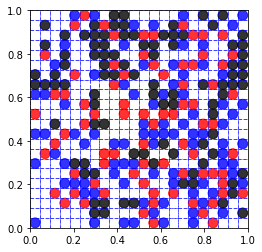

In [5]:
res.plot();  # if you have black circles it indicates bad hamiltonian/calculation

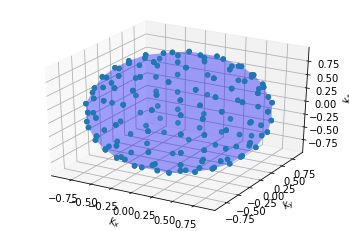

In [6]:
# define a sphere
s = sisld.Sphere(grid=6)
s.plot();

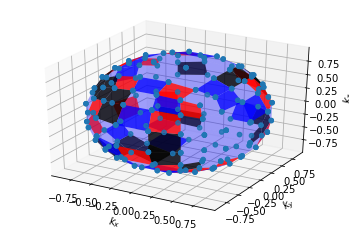

In [7]:
# This calculates the chern invariant on the sphere
res = sisld.getz2(h=some_hamiltonian, chern=True, shape=s)
res.plot();

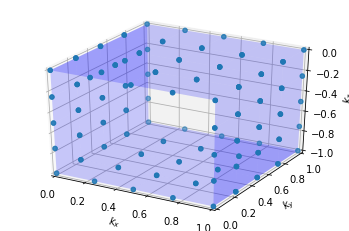

In [8]:
# half-open surface
shape = sisld.FreeShape(grid=5, shape_type="half")
shape.plot();

In [9]:
def cubeToCilinder(k):
    k = sisld.rotate(vector=k, degree=90)  # rotates the points by 90 degree
    phi = atan2(k[1]-.5, k[0]-.5)
    x = cos(phi)
    y = sin(phi)
    z = k[2]
    
    return sisld.resize(np.array([x, y, z]), 1/10)  # ressizes the surface

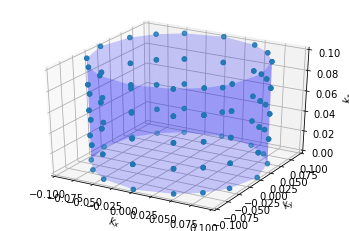

In [10]:
# transform the shape
shape.deform(cubeToCilinder)
shape.plot();

2.0


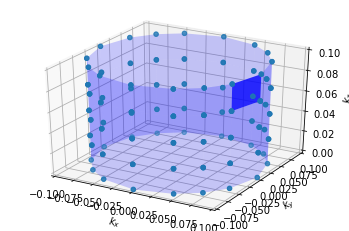

In [11]:
res = sisld.getz2(some_hamiltonian, shape=shape, chern=True)
print(res.chern)
res.plot();